In [99]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from kmeans import k_means

In [100]:
%matplotlib notebook

## Read Data

In [101]:
#load data, drop the name, episodes, and members
## Read data
data_path = './data'
#anime = pd.read_csv(os.path.join(data_path,'anime_cleaned.csv')).drop(['anime_id', 'name','episodes','rating','members'], axis=1)#keep genre
anime = pd.read_csv(os.path.join(data_path,'anime_cleaned.csv')).drop(['anime_id', 'name'], axis=1) #keep genre


test_list = list(anime.columns)
test_string = 'type'
res = [ele for ele in test_list if(test_string in ele)]

print(res)

anime = anime.drop(res, axis=1)


rating = pd.read_csv(os.path.join(data_path,'rating_cleaned.csv'))
rating_derek = pd.read_csv(os.path.join(data_path,'rating_derek.csv'))
rating_fei = pd.read_csv(os.path.join(data_path,'rating_fei.csv'))
rating_sun = pd.read_csv(os.path.join(data_path,'rating_sun.csv'))



rating_miko = pd.read_csv(os.path.join(data_path,'rating_miko.csv'))



#read dataset with names
animeWithName = pd.read_csv(os.path.join(data_path, 'anime_cleaned.csv'))

FileNotFoundError: [Errno 2] No such file or directory: './data\\anime_cleaned.csv'

In [98]:
anime


,episodes,rating,members,genre_Drama,genre_Romance,genre_School,genre_Supernatural,genre_Action,genre_Adventure,genre_Fantasy,...,genre_Josei,genre_ShounenAi,genre_Game,genre_Dementia,genre_Harem,genre_Cars,genre_Kids,genre_ShoujoAi,genre_Yaoi,genre_Yuri
0,0.000000,0.924370,0.197867,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.034673,0.911164,0.782769,1.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.027518,0.909964,0.112683,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.012658,0.900360,0.664323,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.027518,0.899160,0.149180,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10251,0.000000,0.486194,0.004901,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10252,0.001101,0.481393,0.005163,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
10253,0.000000,0.434574,0.003316,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10254,0.000550,0.427371,0.004476,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## Hyperparameters

In [57]:
n_clusters = 10
good_rating_threshold = 5

## Creat dataset

In [58]:
animeData = np.array(anime).astype(int)

(44, 44)


<IPython.core.display.Javascript object>


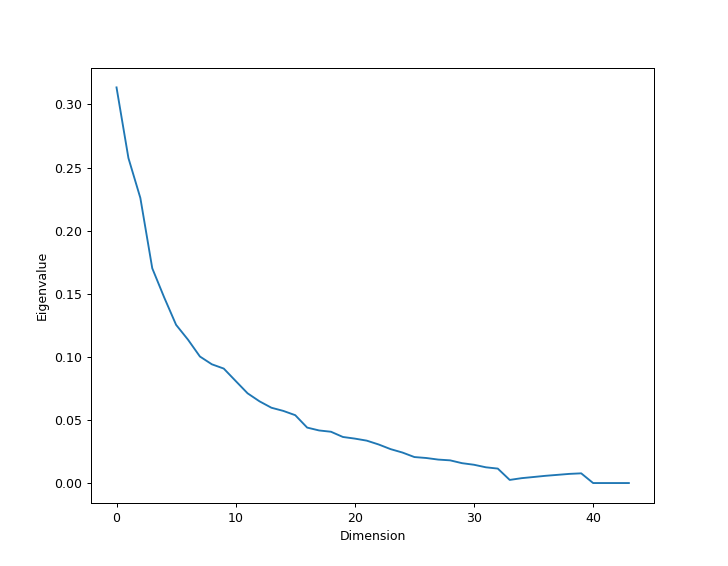

Text(0, 0.5, 'Eigenvalue')

In [59]:
## Visualize PCA-explained variance ratio
animeData_cov = np.cov(np.transpose(animeData))
print(animeData_cov.shape)
eigenvalues, eigenvectors = np.linalg.eig(animeData_cov)
plt.plot(eigenvalues)
plt.xlabel('Dimension')
plt.ylabel('Eigenvalue')

## PCA 
### Reduce to 3-dimension

In [60]:
pca = PCA(n_components = 3)
pca.fit(animeData[:,1:len(animeData)-4])
pca_samples = pca.transform(animeData[:,1:len(animeData)-4])
print(pca_samples)
tocluster = pd.DataFrame(pca_samples)
tocluster

[[-0.20346507 -0.7319127  -0.32970233]
 [ 1.18256678  0.35894043  0.75048697]
 [ 0.53181274  0.92126222 -0.74840513]
 ...
 [ 0.89565547 -0.11784139 -0.46853797]
 [-0.10698128 -0.77698479 -0.21808998]
 [-0.12186757 -0.43455029 -0.0138643 ]]


,0,1,2
0,-0.203465,-0.731913,-0.329702
1,1.182567,0.358940,0.750487
2,0.531813,0.921262,-0.748405
3,0.295104,-0.348048,-0.336353
4,0.531813,0.921262,-0.748405
...,...,...,...
10251,-0.339039,-1.015283,-0.350971
10252,0.929019,-0.134668,-0.575726
10253,0.895655,-0.117841,-0.468538
10254,-0.106981,-0.776985,-0.218090


In [61]:
print('PCA explained variance ratio: ', sum(pca.explained_variance_ratio_))

PCA explained variance ratio:  0.3173135329221817


## K-means or EM

In [96]:
## K-means
#
#clusterer = KMeans(n_clusters=n_clusters, random_state=10).fit(tocluster)
#centers = clusterer.cluster_centers_
#c_preds = clusterer.predict(tocluster)

c_preds,centers = k_means(pca_samples,n_clusters)
centers = np.array(centers)

## EM
#clusterer = GaussianMixture(n_components=n_clusters, random_state=None).fit(tocluster)
#centers = clusterer.means_
#c_preds = clusterer.predict(tocluster)


for i in centers:
 print(i)

plt.rcParams['figure.figsize'] = (9, 7)
 

[-0.09839246 -0.62170921 -0.21329079]
[0.38058563 0.75856792 0.80339811]
[ 0.23534414  0.80419432 -0.37708477]
[-0.64510545  0.2887403  -0.33183856]
[ 0.85074636 -0.05562619 -0.32633828]
[-0.13084264 -0.53100791  0.14717295]
[ 0.17227232 -0.16987505  0.73819886]
[-0.47231248  0.44539665  0.37118338]


<IPython.core.display.Javascript object>


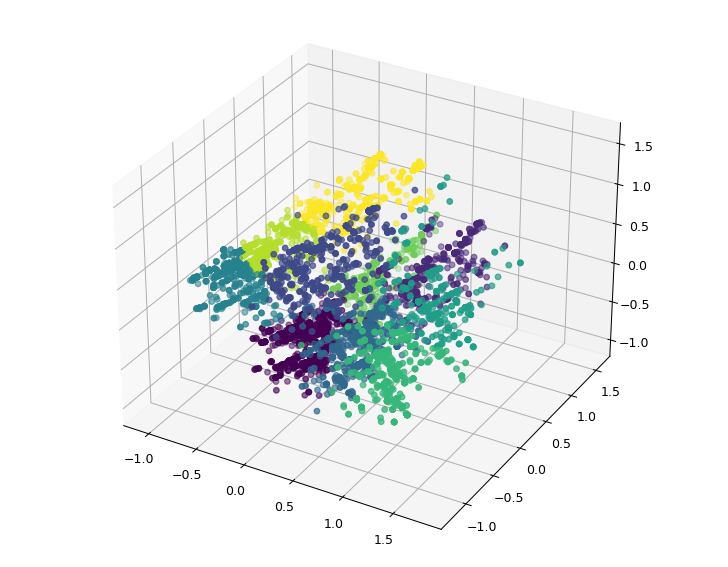

In [84]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(tocluster[0], tocluster[2], tocluster[1], c = c_preds)
plt.title('Data points in 3D PCA axis', fontsize=10)
plt.show()

 ## Regenerate Centers with Anime Names

In [85]:
#assign each anime with its cluster
animeWithName['cluster centers'] = c_preds
animeWithName['pca_x'] = tocluster[0]
animeWithName['pca_y'] = tocluster[1]
animeWithName['pca_z'] = tocluster[2]

In [86]:
#define function to view a cluster dedicatly
def clusterView(df):
    colNames = [column for column in df]
    #only read the genre of animes
    genreNames = colNames[5:len(colNames) - 8]#only count genre
    genreDict = {}
    nameDict = {}
    #create empty dict for cols
    for i in genreNames:
        genreDict [i] = 0
    for i in genreNames:
        genreScore = np.sum(df[i])
        genreDict [i] = genreScore
    #sort the map
    genreSort = sorted(genreDict.items(), key = lambda kv:(kv[1], kv[0]))
    print("liked genres and appeared time:")
    for i in reversed(genreSort):
        print(i)    
    
    return reversed(genreSort)       

In [87]:
""""
def pickTopAnime(df):
    #get the center
    center = df['cluster centers']
    clusterCenter = centers[center - 1]
    #choose the nearest datapoint
    pcaPoints = df[['pca_x','pca_y','pca_z']]
    
    distances = [] 
    
    center = np.array(clusterCenter)
    pcas = np.array(pcaPoints)
   
    distances = np.sum(np.square(center-pcas),1) 
    listDistances = distances.tolist()
    
    topAnime = {}
    
    for i in range(len(listDistances)):
        topAnime[df.iloc[i,1]] = (listDistances[i])
      
     
    animeSort =  sorted(topAnime.items(), key = lambda kv:(kv[1], kv[0]))
    #print( animeSort)
    return animeSort
""""

SyntaxError: EOL while scanning string literal (<ipython-input-87-231ccad4f78b>, line 26)

In [88]:
def pickTopAnime(df,usercenter):
    #get the center
    center = df['cluster centers']
    
   
    
    clusterCenter = centers[center - 1]
    
    print("center:::::::::::::::",clusterCenter)
    #choose the nearest datapoint
    pcaPoints = df[['pca_x','pca_y','pca_z']]
    
    distances = [] 
    
    center = np.array(usercenter)
    pcas = np.array(pcaPoints)
   
    distances = np.sum(np.square(center-pcas),1) 
    listDistances = distances.tolist()
    
    topAnime = {}
    
    for i in range(len(listDistances)):
        topAnime[df.iloc[i,1]] = (listDistances[i])
      
     
    animeSort =  sorted(topAnime.items(), key = lambda kv:(kv[1], kv[0]))
    #print( animeSort)
    return animeSort
    

In [89]:
 def getMean(userid, rating, anime):
    user = rating.loc[rating['user_id']==userid]
    mean = np.mean(user['rating'])
    
    animeLike = np.array(user.loc[user['rating'] > mean]['anime_id'])
    #animeLike = np.array(user.loc[user['rating'] > good_rating_threshold]['anime_id'])
    
    x = 0.0
    y = 0.0
    z = 0.0
    count = 0
    print(animeLike)
    for i in animeLike:
        try:
            temp = anime.loc[anime['anime_id'] == i]
            #print(count)
        except:
            continue
        count += 1
        x += float(temp['pca_x'])
        y += float(temp['pca_y'])
        z += float(temp['pca_z'])
    return [x/count,y/count,z/count]

In [90]:
def recommand(mean, centers):
    shortest = 10000.0
    idx = 0
    for c in range(len(centers)):
        distance = np.sqrt(np.sum((np.array(centers[c]) - np.array(mean))**2))
        if distance < shortest:
            shortest = distance
            idx = c
    return idx

 ## Recommendation system test out

In [91]:
#allocating clusters:
animeClusters = []
genreScores = []
topAnimes = []
for i in range(n_clusters):
    animeClusters.append(animeWithName.loc[animeWithName['cluster centers']==i])

#usermean = getMean(11, rating, animeWithName)
usermean_miko = getMean(-10, rating_miko, animeWithName)
#usermean_fei = getMean(-6, rating_fei, animeWithName)
#usermean_sun = getMean(-11, rating_sun, animeWithName)
usermean = usermean_miko

print("the user mean are: ", usermean)
index = recommand(usermean, centers)
print("choosing clustering #", index)

[1096 1288 1080]
the user mean are:  [0.610377570735181, -0.1947373076956509, -0.7212892963272443]
choosing clustering # 6


In [92]:
print(clusterView(animeClusters[index]))

liked genres and appeared time:
('genre_Sci-Fi', 590.0)
('genre_Action', 562.0)
('genre_Mecha', 368.0)
('genre_Drama', 189.0)
('genre_Military', 185.0)
('genre_Space', 172.0)
('type_Movie', 151)
('genre_Shounen', 108.0)
('genre_SuperPower', 61.0)
('genre_Romance', 60.0)
('genre_Adventure', 43.0)
('genre_Seinen', 36.0)
('genre_Psychological', 30.0)
('genre_Horror', 27.0)
('genre_Music', 26.0)
('genre_Police', 23.0)
('genre_Mystery', 23.0)
('genre_School', 19.0)
('genre_Supernatural', 15.0)
('genre_Historical', 11.0)
('genre_Sports', 8.0)
('genre_MartialArts', 7.0)
('genre_Demons', 7.0)
('type_Music', 6)
('genre_Shoujo', 6.0)
('genre_Game', 6.0)
('genre_Comedy', 5.0)
('genre_Cars', 5.0)
('genre_SliceofLife', 4.0)
('genre_Parody', 4.0)
('genre_Magic', 4.0)
('genre_Fantasy', 4.0)
('genre_Dementia', 4.0)
('genre_Vampire', 3.0)
('genre_Thriller', 3.0)
('genre_Samurai', 3.0)
('genre_ShoujoAi', 2.0)
('genre_Yuri', 1.0)
('genre_Yaoi', 1.0)
('genre_ShounenAi', 1.0)
('genre_Kids', 0.0)
('genre_Jo

In [93]:
rec_list = pickTopAnime(animeClusters[index],usermean)
print("top pick for the user is: ", rec_list[0][0])

center::::::::::::::: [[ 1.13988652  0.39849265 -0.09693184]
 [ 1.13988652  0.39849265 -0.09693184]
 [ 1.13988652  0.39849265 -0.09693184]
 ...
 [ 1.13988652  0.39849265 -0.09693184]
 [ 1.13988652  0.39849265 -0.09693184]
 [ 1.13988652  0.39849265 -0.09693184]]
top pick for the user is:  Haai Step Jun


In [94]:
rec_list

[('Haai Step Jun', 0.007071653712528814),
 ('Accel World', 0.0090587262912257),
 ('Accel World EX', 0.0090587262912257),
 ('Accel World: Infinite∞Burst', 0.0090587262912257),
 ('Busou Shinki', 0.013461039186458561),
 ('KanColle Movie', 0.014484161287620829),
 ('Kantai Collection: KanColle', 0.014484161287620829),
 ('Ghost in the Shell: Stand Alone Complex - Solid State Society',
  0.01548670707066315),
 ('Ghost in the Shell: Stand Alone Complex - Solid State Society 3D',
  0.01548670707066315),
 ('Code Geass: Hangyaku no Lelouch Recaps', 0.02891449214725653),
 ('Code Geass: Hangyaku no Lelouch Special Edition Black Rebellion',
  0.02891449214725653),
 ('Ghost in the Shell 2: Innocence', 0.02912473639485546),
 ('Mobile Suit Gundam MS IGLOO: Apocalypse 0079', 0.03134963822639211),
 ('Mobile Suit Gundam MS IGLOO: The Hidden One Year War', 0.03134963822639211),
 ('Mobile Suit Gundam Seed C.E.73: Stargazer', 0.03134963822639211),
 ('Mobile Suit Gundam: More Information on the Universal Cent